# 1) Setup

In [6]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy.stats import kstest
from copy import copy

import pymongo
from pymongo import MongoClient
from datetime import datetime
print("done")

done


In [7]:
#import functions from python files

#1) data import & filtering
from get_data import *
from filter_data import *
from select_data import *

#2) Frequentist
from Gaussian import *
from Gaussian_ml import *
from Gaussian_freq import *

from update_mean import *
from update_var import *
from Gaussian_freq_update import *

#3) Bayesian: uni-parameter
from Gaussian_bayes import *
from Gaussian_bayes_update import *

#4) Bayesian: multi-parameter
from Gamma import *
from Gaussian_broadcast import *
from Normal_Gamma import *
from Normal_Gamma_bayes import *
from Normal_Gamma_bayes_update import *

#5) Stats tests
from error_mae import *
from error_mse import *
from integrate_pdf import *

from error_ks import *                 #Kolmogorov-Smirnov
from error_ks_2samples import *
from error_cvm import *                #Cramer-von Mises
from error_cvm_2samples import *

from Gaussian_log_likelihood import *
from error_aic import *                #Akaike Information Criterion
from error_bic import *                #Bayesian Information Criterion

#6) Other distributions
from Lognormal import *


#7) Other edges
from select_data_edge import *
from underscore_prefix import *
from underscore_suffix import *

from edge_direction import *
from edge_plot import *
from edge_plot_gaussian import *
from edge_plot_lognormal import *


print("done")

done


In [8]:
#1) Import raw data from PyMongo
df = get_data()
#2) Preliminary filtering
df = filter_data(df)

# 2) Does the direction matter?
- i.e. does it matter which is the origin & which is the target node?
- Short answer: YES
- Note: ignore the error message for the code

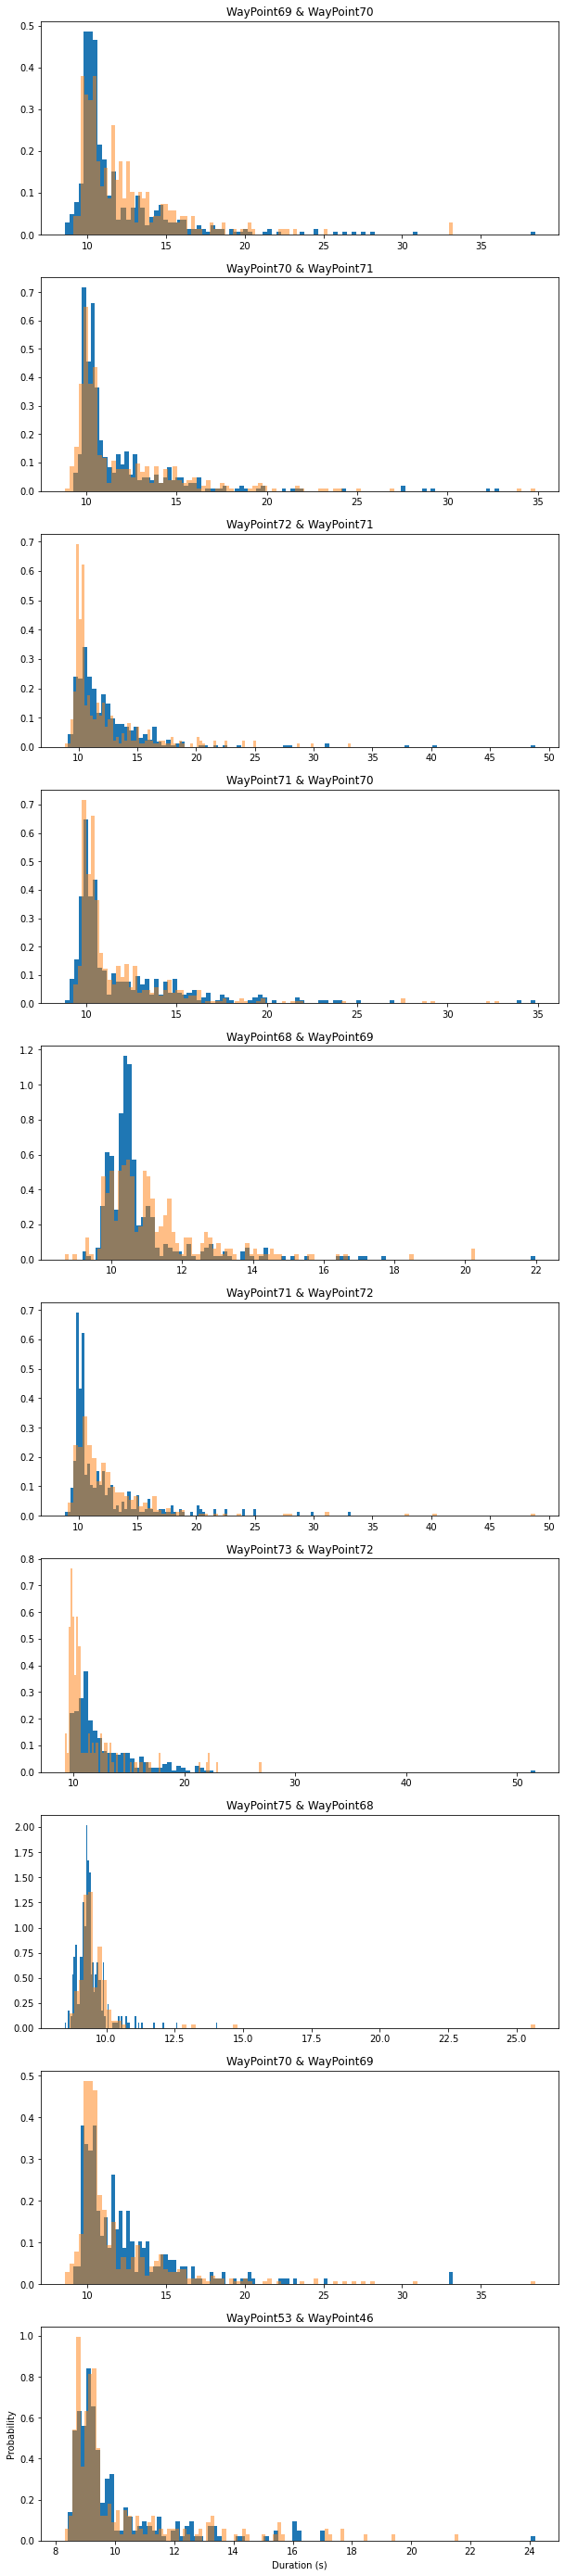

In [10]:
count = edge_direction(df, n_plots = 10)

In [14]:
count.to_csv('edge_direction.csv')
count.head(4)

,edge_id,samples,origin,target,ks statistic,ks p-value,reversible
0,WayPoint69_WayPoint70,467,WayPoint69,WayPoint70,0.178514,2.12114e-05,False
1,WayPoint70_WayPoint71,456,WayPoint70,WayPoint71,0.0878522,0.0703277,True
2,WayPoint72_WayPoint71,408,WayPoint72,WayPoint71,0.200182,4.22567e-07,False
3,WayPoint71_WayPoint70,396,WayPoint71,WayPoint70,0.0878522,0.0703277,True


In [15]:
n_reversible = 0
reversible_edges = []
n_total = len(count["edge_id"])
for i in range(n_total):
    if count["reversible"][i] == True:
        n_reversible += 1
        reversible_edges.append(count["edge_id"][i])
print(n_reversible, "out of", n_total)


20 out of 89


# 3) Do different edges have differently-shaped distributions
- Do the distributions all look similar?
- Not all edges have enough data to infer a shape from
- Most edges with enough data look like WayPoint69_WayPoint70
- There were a few edges that looked multimodal: WayPoint110_WayPoint68, WayPoint112_WayPoint82, WayPoint111_WayPoint75

(751, 2)


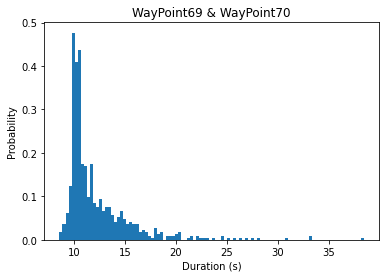

In [16]:
#1) Select data of interest
wp1 = "WayPoint69"
wp2 = "WayPoint70"
subset = select_data(df, wp1, wp2)

#df.head(2)

#2) plot
t_op = subset["operation_time"]
plt.hist(t_op, density = True, bins = 100);
plt.xlabel("Duration (s)")
plt.ylabel("Probability")
plt.title(str(wp1) + " & " + str(wp2))

print(subset.shape)

'Done'

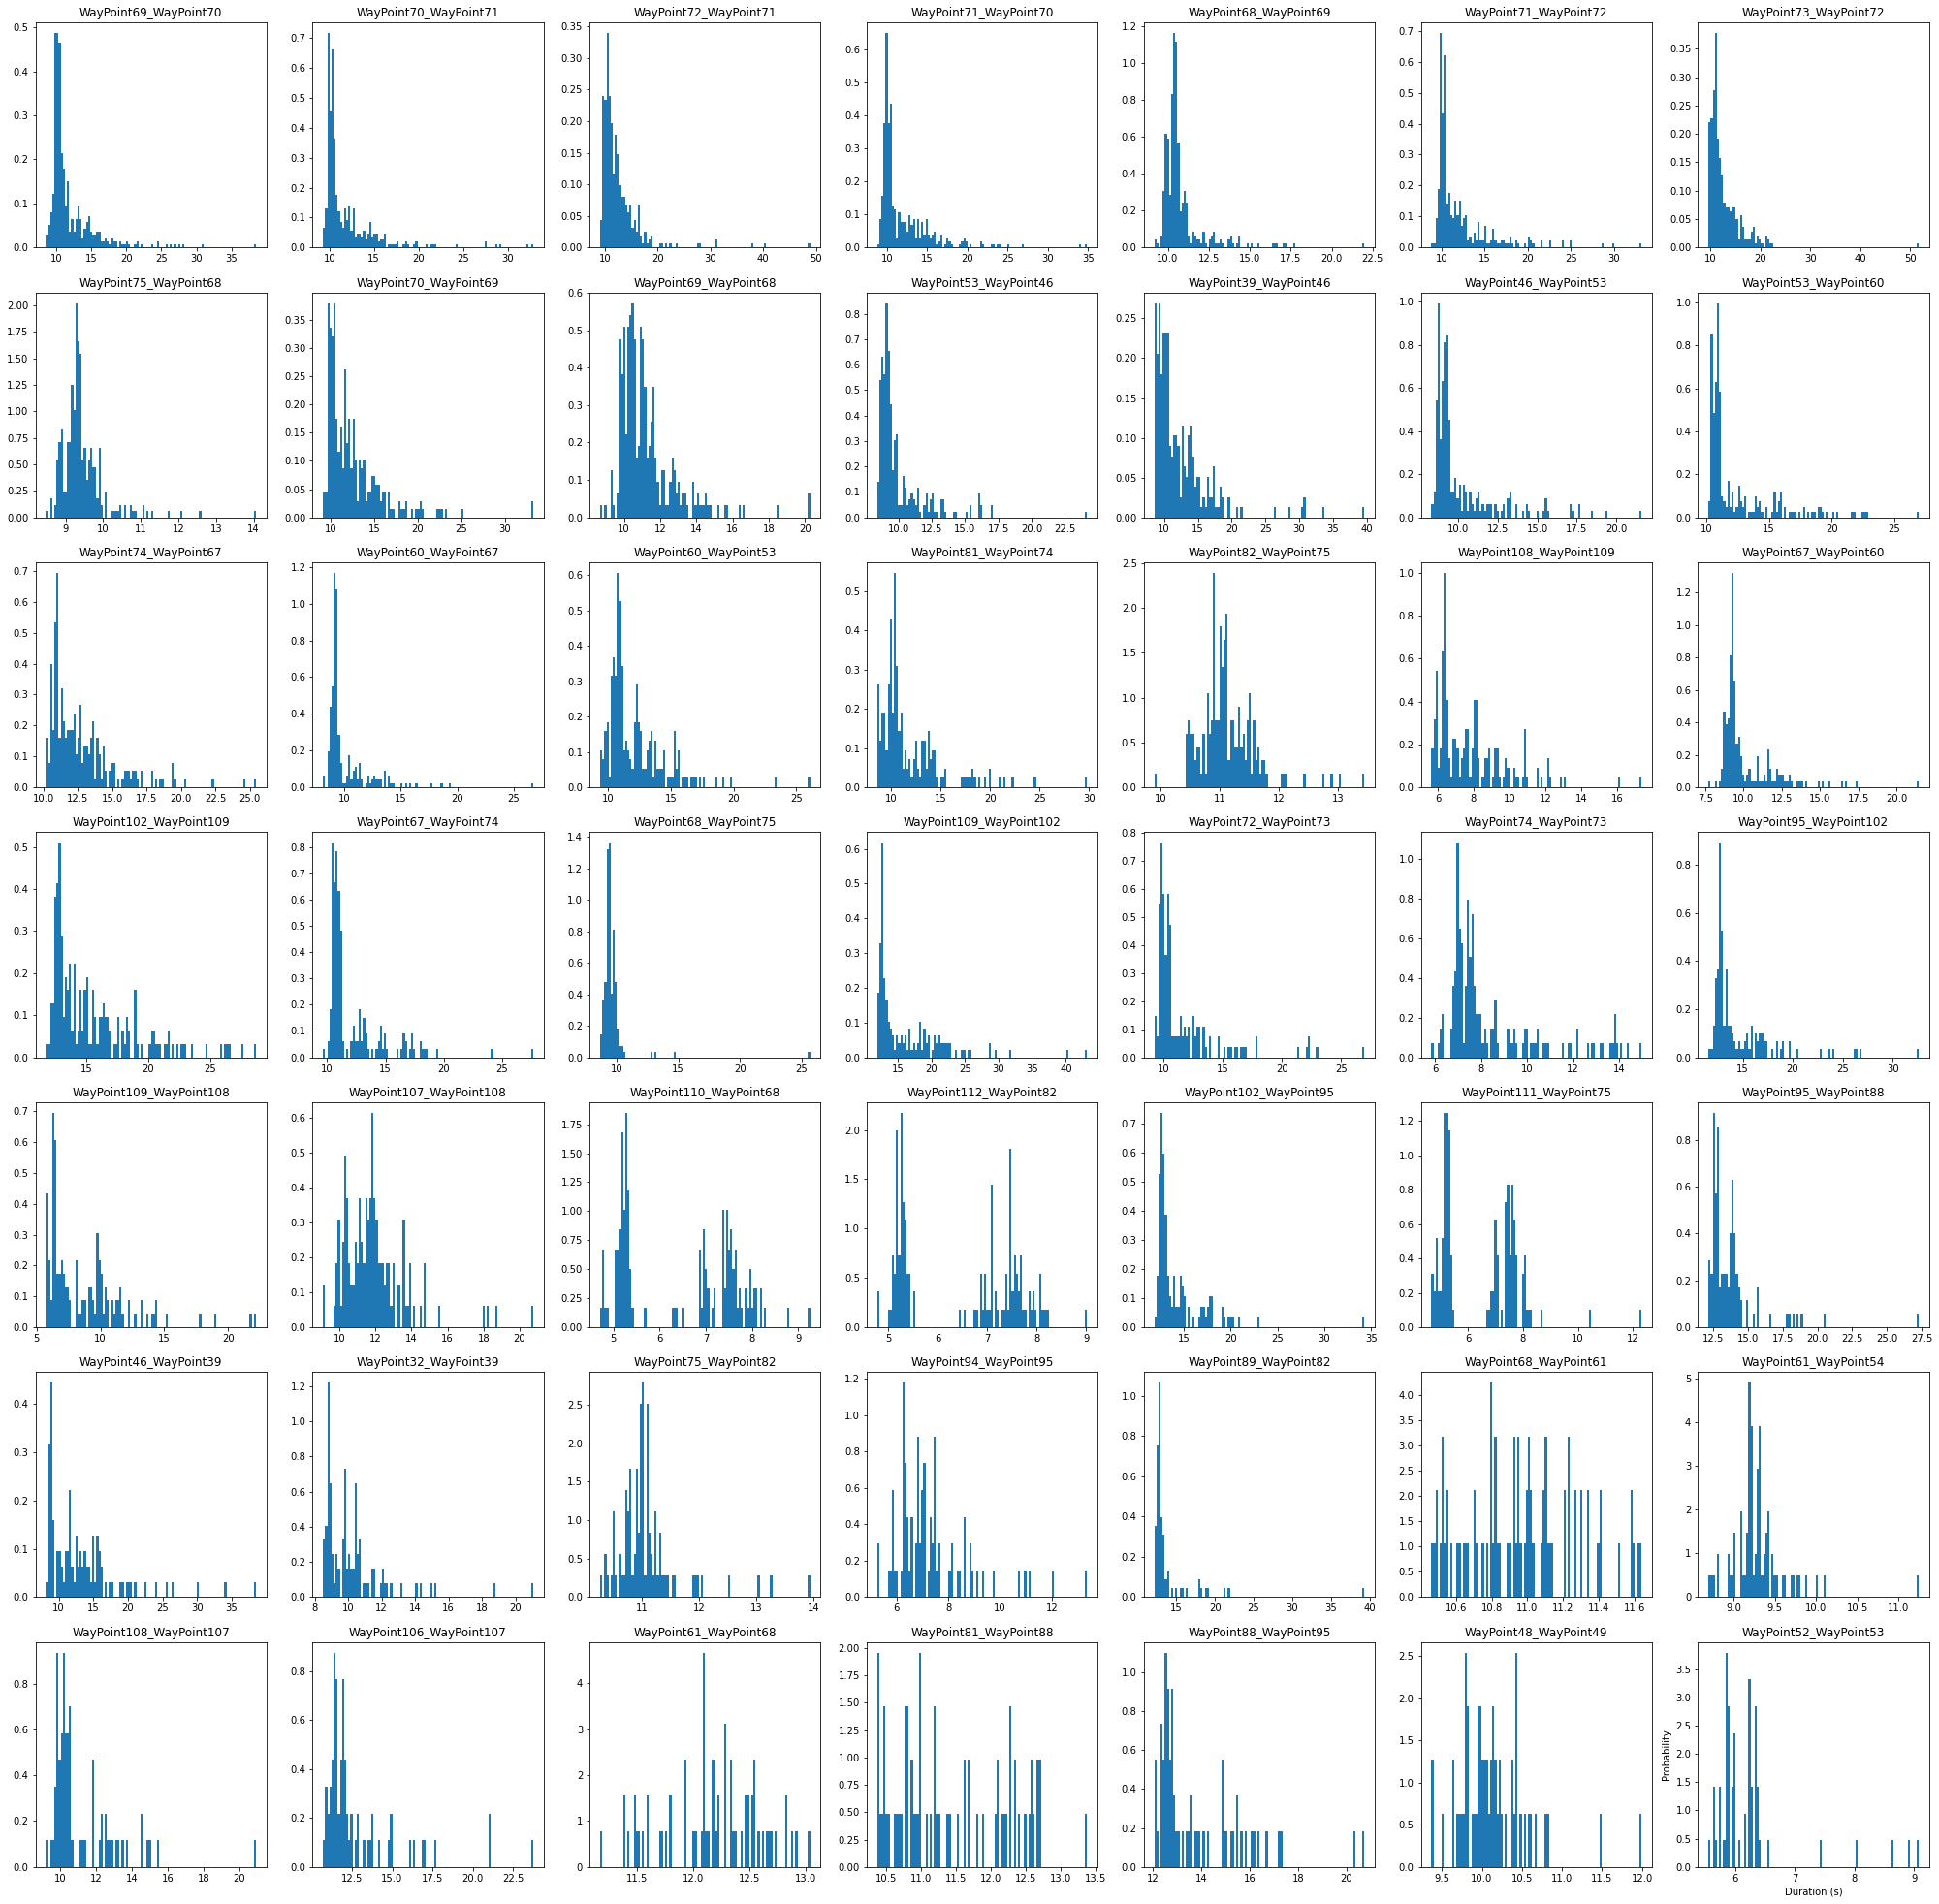

In [18]:
#plot duration distributions with the most data
edge_plot(df, count, n_rows = 7, n_cols = 7)

# 4) Try fitting models to these edges

## 4a) Gaussian
- Not a good fit

'Done'

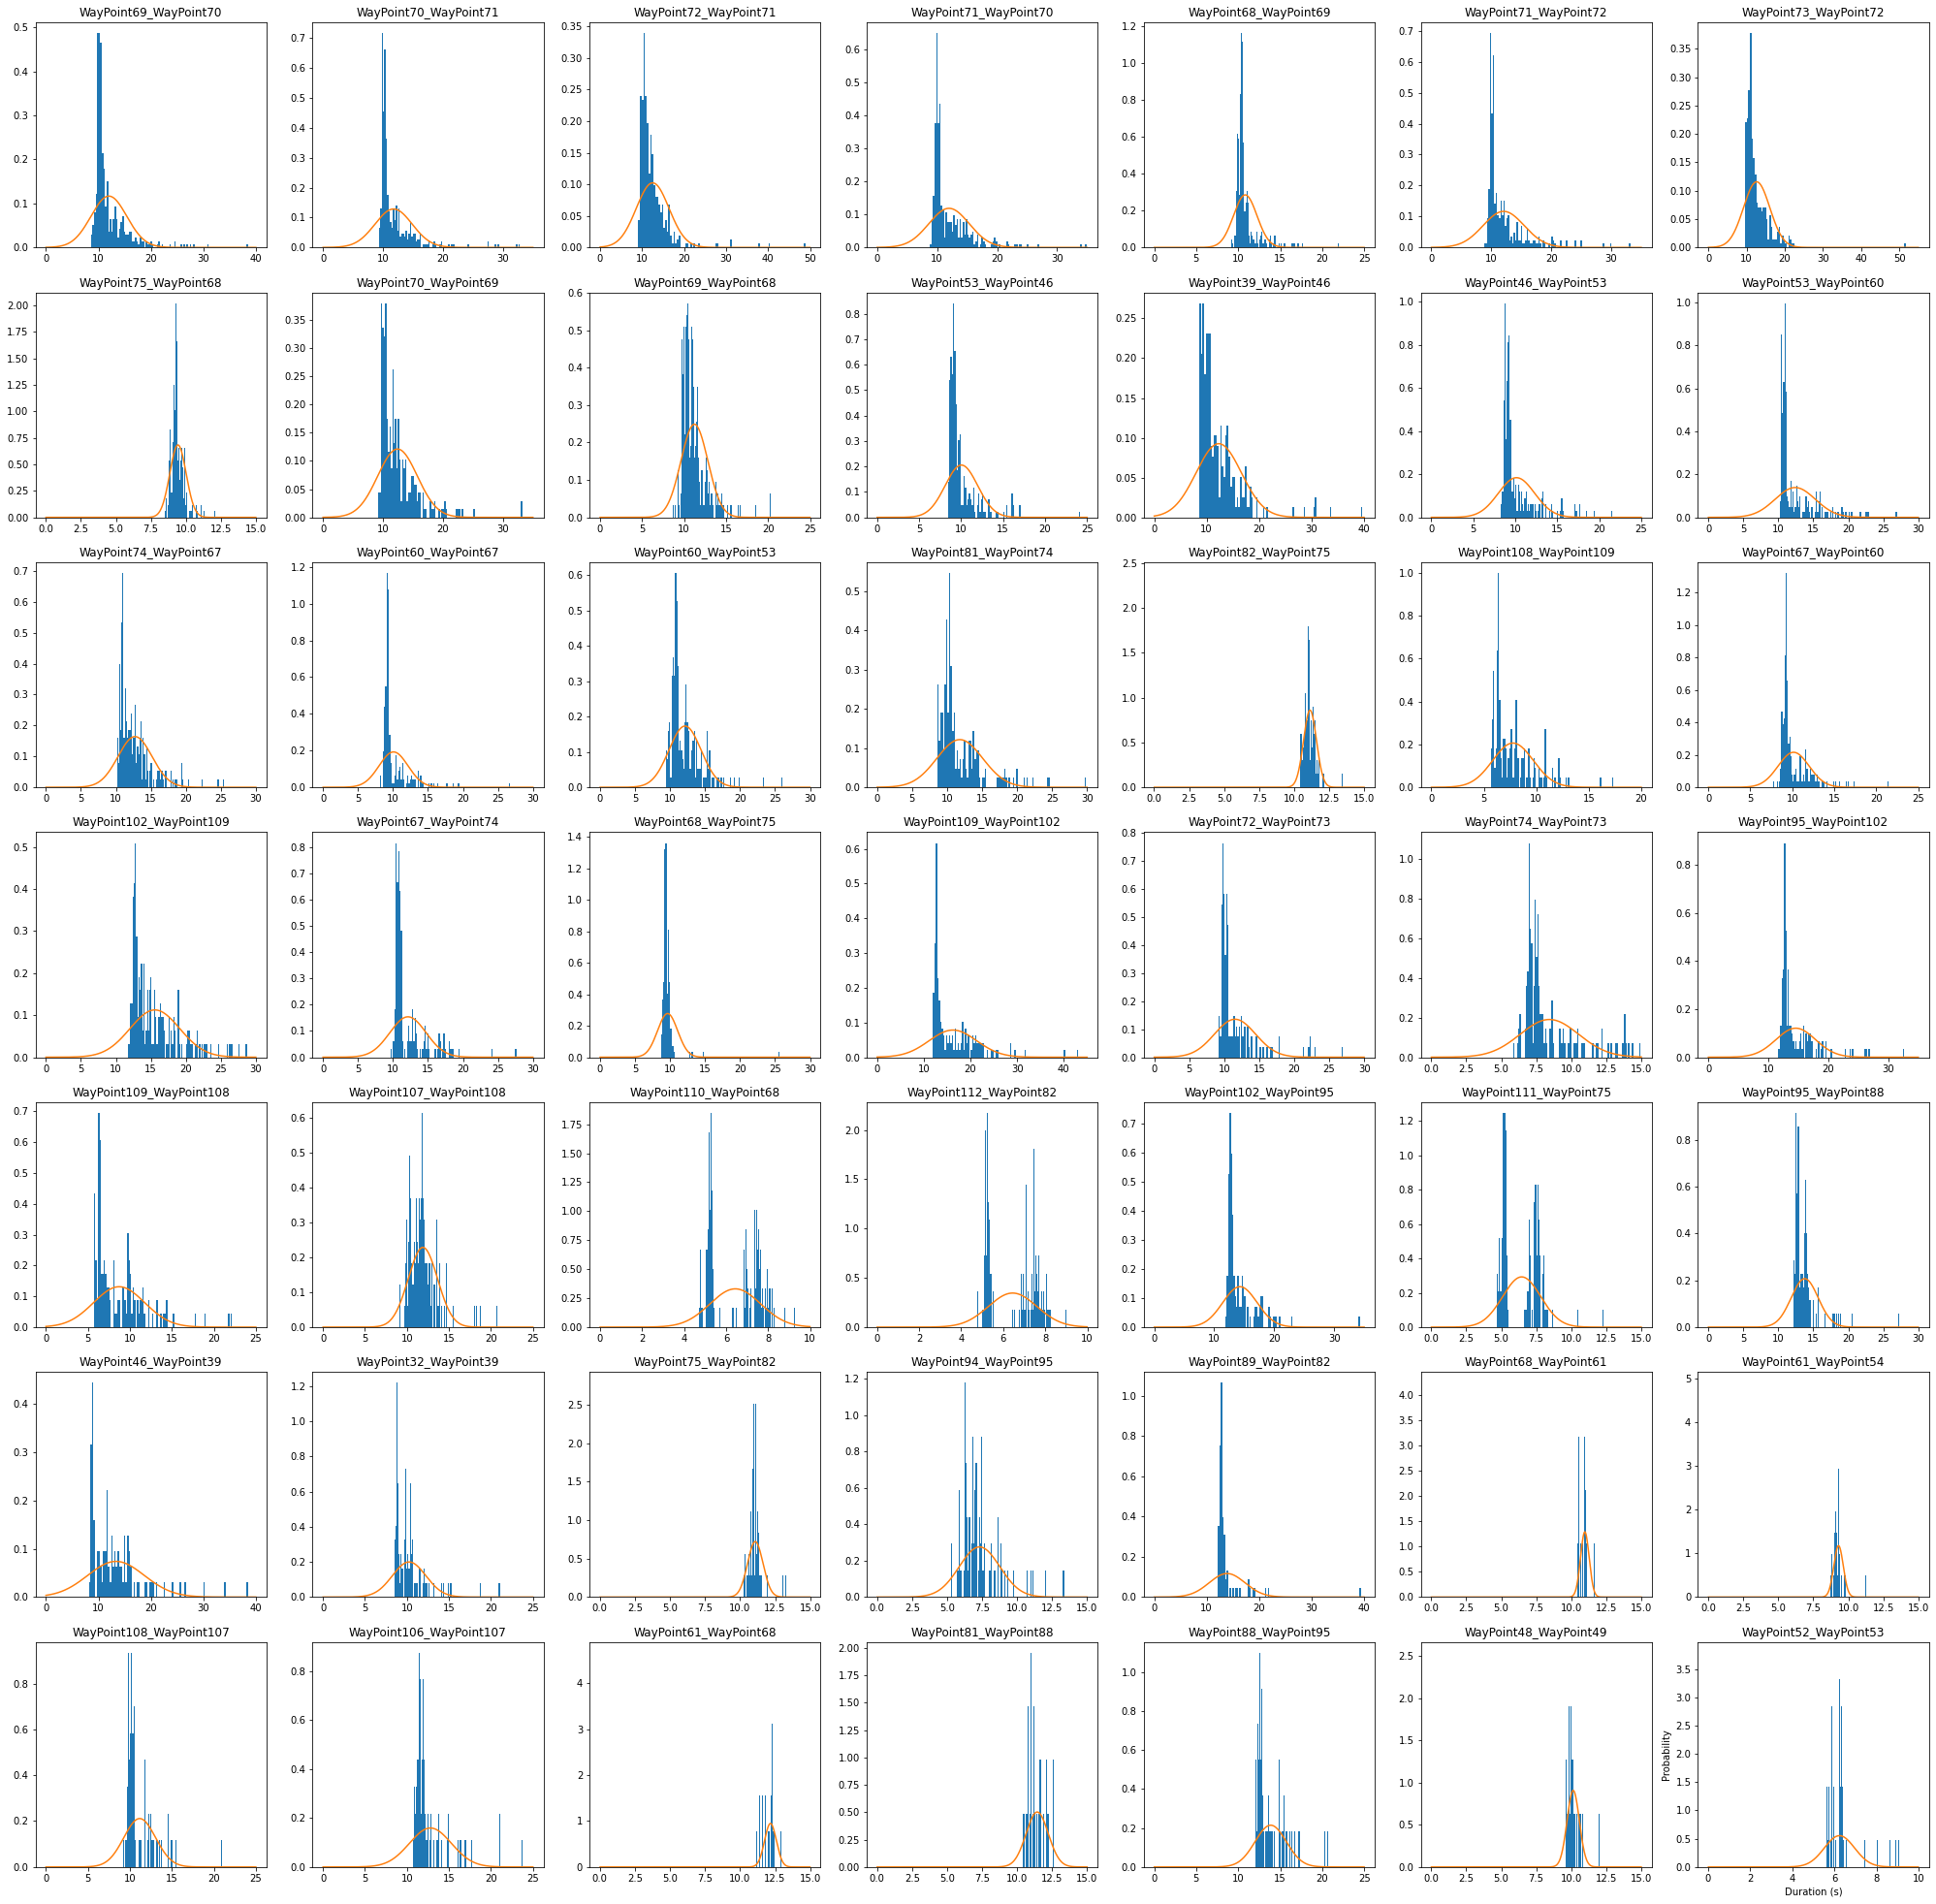

In [19]:
#plot duration distributions with the most data & fit to Gaussian
edge_plot_gaussian(df, count, n_rows = 7, n_cols = 7)

## 4b) Lognormal
- Fairly good fit, but underestimates the peak of the distribution
- Bad fit for the multimodal edges

'Done'

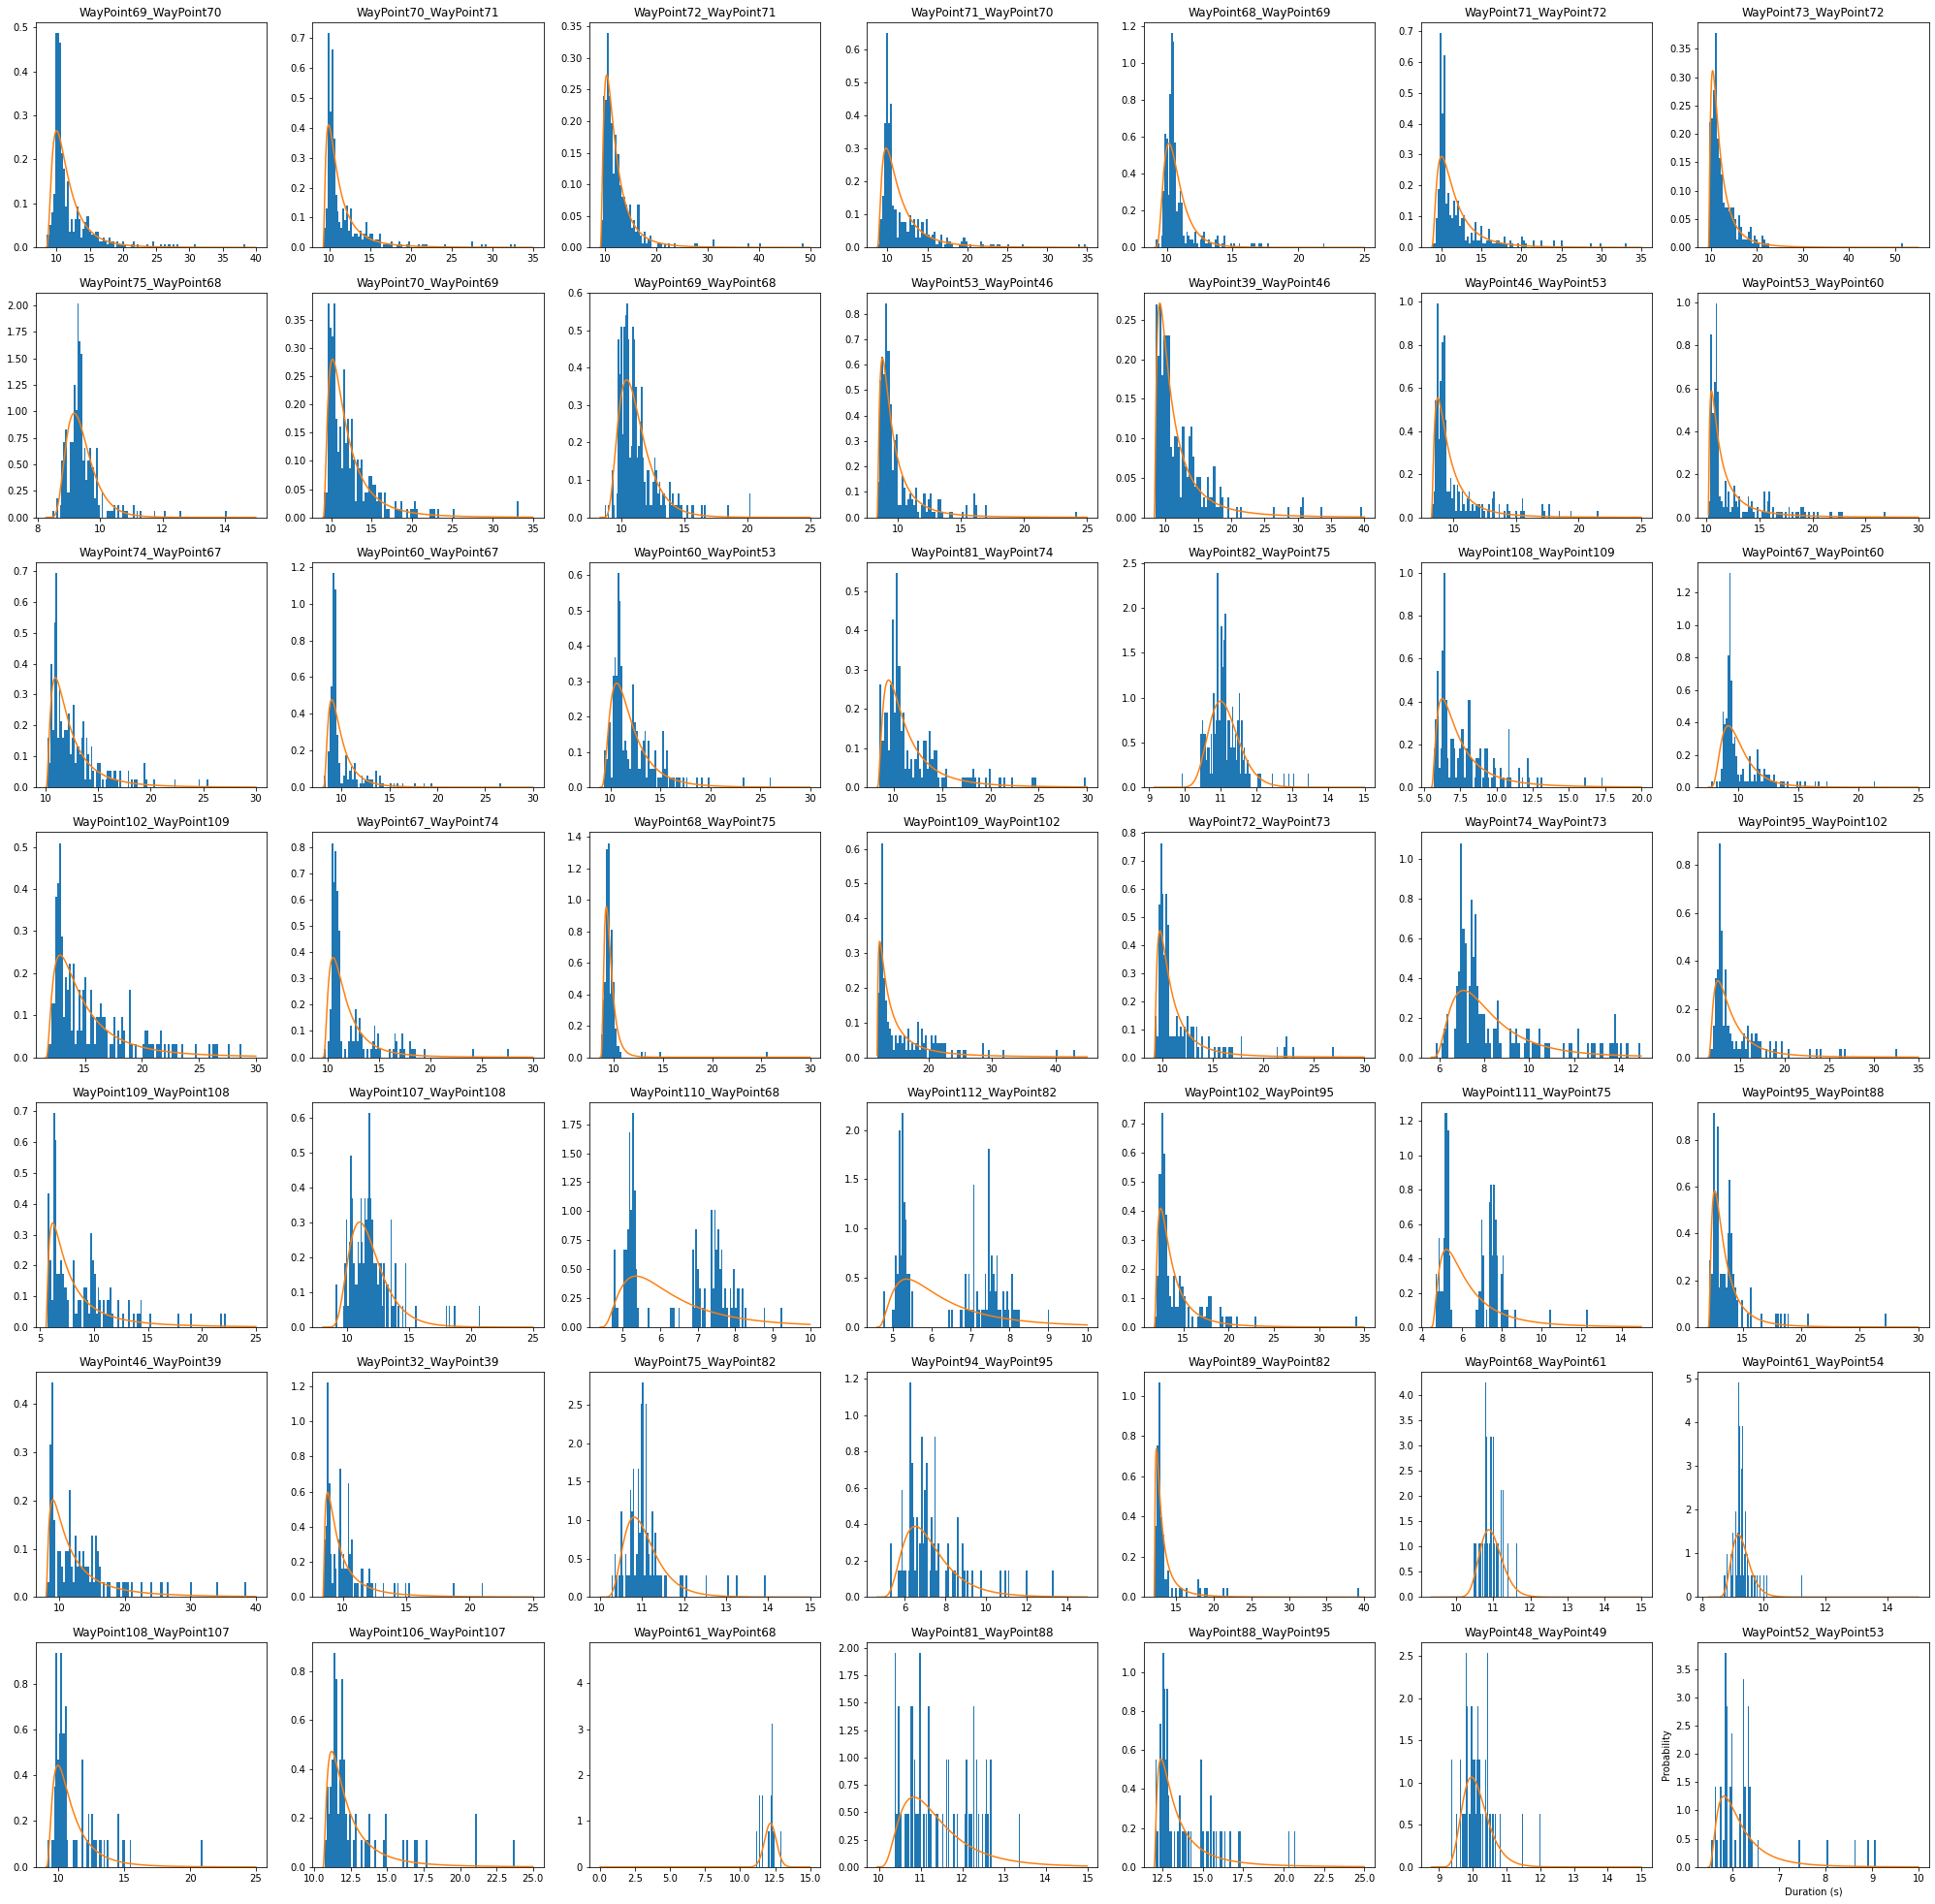

In [21]:
#plot duration distributions with the most data & fit to lognormal
edge_plot_lognormal(df, count, n_rows = 7, n_cols = 7)